In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense
from keras import backend as K
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import csv
import pandas as pd
from keras.preprocessing import image
from tensorflow import keras
from tensorflow import lite
#load library untuk train test split
from sklearn.model_selection import train_test_split
import shutil
from tqdm.notebook import tqdm as tq


In [7]:
'''
import Augmentor
import os

def perbanyak_(ini, sebanyak_ini):
    source_dir = ini
    output_dir = "."
    p = Augmentor.Pipeline(source_directory=source_dir, output_directory=output_dir)
    #p.random_distortion(probability=1, grid_width=4, grid_height=4, magnitude=1)
    p.rotate(probability=0.7, max_left_rotation=13, max_right_rotation=13)
    p.zoom_random(probability=0.5, percentage_area=0.9)
    p.crop_random(probability=0.6, percentage_area=0.9)
    p.resize(probability=1.0, width=64, height=64)

    p.sample(sebanyak_ini)

perbanyak_("batuan/giokhijau", 1000)
perbanyak_("batuan/kecubungungu", 1000)
'''


Initialised with 38 image(s) found.
Output directory set to batuan/giokhijau\..

Processing <PIL.Image.Image image mode=RGBA size=64x64 at 0x15349CA5BD0>: 100%|█| 1000/1000 [00:07<00:00, 133.78 Sample


Initialised with 22 image(s) found.
Output directory set to batuan/kecubungungu\..

Processing <PIL.Image.Image image mode=RGBA size=64x64 at 0x153494459F0>: 100%|█| 1000/1000 [00:05<00:00, 172.96 Sample


In [4]:
import cv2
import glob
import random 
import numpy as np

x=[]
y=[]

for gambar in glob.glob("batuan/batukali/*"):
    ini=cv2.imread(gambar)
    ini=cv2.resize(ini,(64,64))/255
    x.append(ini)
    y.append(0)
for gambar in glob.glob("batuan/badarbesi/*"):
    ini=cv2.imread(gambar)
    ini=cv2.resize(ini,(64,64))/255
    x.append(ini)
    y.append(1)
for gambar in glob.glob("batuan/badarlumut/*"):
    ini=cv2.imread(gambar)
    ini=cv2.resize(ini,(64,64))/255
    x.append(ini)
    y.append(2)
for gambar in glob.glob("batuan/giokhijau/*"):
    ini=cv2.imread(gambar)
    ini=cv2.resize(ini,(64,64))/255
    x.append(ini)
    y.append(3)
for gambar in glob.glob("batuan/giokbiru/*"):
    ini=cv2.imread(gambar)
    ini=cv2.resize(ini,(64,64))/255
    x.append(ini)
    y.append(4)
for gambar in glob.glob("batuan/giokmerah/*"):
    ini=cv2.imread(gambar)
    ini=cv2.resize(ini,(64,64))/255
    x.append(ini)
    y.append(5)
for gambar in glob.glob("batuan/kecubungungu/*"):
    ini=cv2.imread(gambar)
    ini=cv2.resize(ini,(64,64))/255
    x.append(ini)
    y.append(6)

z = list(zip(x, y))
random.shuffle(z)
x, y = zip(*z)
x = np.asarray(x)
y = np.asarray(y)

In [15]:
x.shape

(7154, 64, 64, 3)

In [13]:
y

array([3, 3, 3, 3, 1, 1, 1, 5, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 5, 1,
       4, 2, 1, 1, 5, 1, 2, 5, 3, 1, 3, 5, 4, 1, 1, 1, 1, 5, 0, 1, 3, 3,
       5, 5, 2, 4, 1, 1, 1, 5, 1, 1, 4, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 4,
       1, 0, 0, 1, 0, 3, 1, 1, 1, 1, 1, 1, 4, 1, 4, 5, 5, 3, 1, 1, 3, 3,
       1, 1, 1, 1, 1, 3, 4, 2, 4, 1, 5, 4, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1,
       1, 1, 3, 4, 1, 4, 3, 3, 1, 2, 3, 1, 1, 1, 0, 3, 4, 1, 3, 3, 1, 2,
       3, 1, 3, 1, 1, 1, 3, 0, 5, 1, 0, 4, 3, 1, 1, 0, 3, 3, 1, 2, 5, 5,
       3, 4, 3, 0, 4, 2, 0, 1, 3, 1, 1, 2, 3, 3, 1, 1, 1, 3, 3, 1, 3, 5,
       1, 2, 3, 1, 4, 1, 1, 2, 4, 1, 5, 3, 5, 1, 1, 1, 4, 4, 4, 3, 2, 4,
       3, 1, 1, 3, 3, 3, 0, 5, 3, 0, 1, 3, 5, 1, 3, 1, 4, 3, 4, 0, 3, 5,
       1, 1, 2, 5, 1, 0, 1, 4, 1, 3, 2, 4, 2, 5, 3, 5, 3, 5, 3, 5, 1, 1,
       1, 1, 0, 1, 1, 1, 5, 3, 1, 1, 5, 3, 1, 5, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 2, 5, 5, 1, 3, 1, 5, 5, 3, 3, 1, 5, 2, 1, 1, 4, 1, 5, 1, 1, 5,
       2, 1, 4, 1, 1, 5, 3, 1, 3, 4, 1, 5, 3, 3, 1,

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(64,64,3), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3,3), activation="relu"))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(22, activation="relu"))
model.add(Dense(7, activation="softmax"))


model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                    

In [5]:
history = model.fit(x,y,batch_size=2, epochs=20, validation_split=0.2)

Epoch 1/20
2816/2816 [==============================] - 63s 22ms/step - loss: 0.7043 - accuracy: 0.7294 - val_loss: 0.5320 - val_accuracy: 0.8169
Epoch 2/20
2816/2816 [==============================] - 81s 29ms/step - loss: 0.4463 - accuracy: 0.8464 - val_loss: 0.2444 - val_accuracy: 0.9134
Epoch 3/20
2816/2816 [==============================] - 79s 28ms/step - loss: 0.3450 - accuracy: 0.8917 - val_loss: 0.2263 - val_accuracy: 0.9347
Epoch 4/20
2816/2816 [==============================] - 80s 28ms/step - loss: 0.2326 - accuracy: 0.9300 - val_loss: 0.1959 - val_accuracy: 0.9397
Epoch 5/20
2816/2816 [==============================] - 81s 29ms/step - loss: 0.1926 - accuracy: 0.9425 - val_loss: 0.3384 - val_accuracy: 0.9262
Epoch 6/20
2816/2816 [==============================] - 85s 30ms/step - loss: 0.1388 - accuracy: 0.9561 - val_loss: 0.1177 - val_accuracy: 0.9539
Epoch 7/20
2816/2816 [==============================] - 84s 30ms/step - loss: 0.1871 - accuracy: 0.9545 - val_loss: 0.0588 -

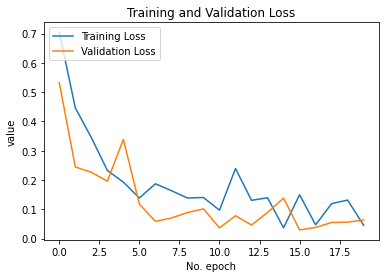

In [6]:
from matplotlib import pyplot as plt
# Plot history: MAE
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

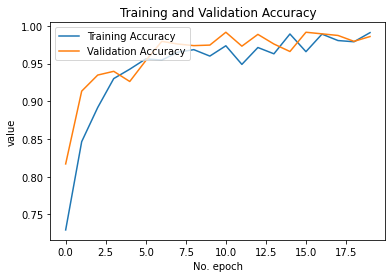

In [7]:
# Plot history: MSE
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [3]:
model.save('percobaan8.h5')

In [5]:
model.load_weights('percobaan8.h5')

In [7]:
import cv2
import glob
import random 
import numpy as np

x=[]
y=[]

for gambar in glob.glob("dataset/test/batukali/*"):
    ini=cv2.imread(gambar)
    ini=cv2.resize(ini,(64,64))/255
    x.append(ini)
    y.append(0)
for gambar in glob.glob("dataset/test/badarbesi/*"):
    ini=cv2.imread(gambar)
    ini=cv2.resize(ini,(64,64))/255
    x.append(ini)
    y.append(1)
for gambar in glob.glob("dataset/test/badarlumut/*"):
    ini=cv2.imread(gambar)
    ini=cv2.resize(ini,(64,64))/255
    x.append(ini)
    y.append(2)
for gambar in glob.glob("dataset/test/giokhijau/*"):
    ini=cv2.imread(gambar)
    ini=cv2.resize(ini,(64,64))/255
    x.append(ini)
    y.append(3)
for gambar in glob.glob("dataset/test/giokbiru/*"):
    ini=cv2.imread(gambar)
    ini=cv2.resize(ini,(64,64))/255
    x.append(ini)
    y.append(4)
for gambar in glob.glob("dataset/test/giokmerah/*"):
    ini=cv2.imread(gambar)
    ini=cv2.resize(ini,(64,64))/255
    x.append(ini)
    y.append(5)
for gambar in glob.glob("dataset/test/kecubungungu/*"):
    ini=cv2.imread(gambar)
    ini=cv2.resize(ini,(64,64))/255
    x.append(ini)
    y.append(6)


In [8]:
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix

ypred = model.predict(np.asarray(x))
ypred = np.argmax(ypred, axis=1)

2/2 [==============================] - 0s 23ms/step


In [9]:
accuracy_score(ypred,y)

0.15789473684210525

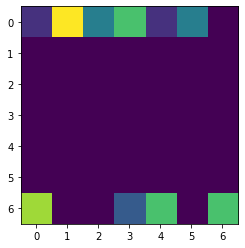

In [10]:
cm= confusion_matrix(ypred,y)
plt.imshow(cm)

In [11]:
cm

array([[1, 7, 3, 5, 1, 3, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [6, 0, 0, 2, 5, 0, 5]], dtype=int64)